In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame([[8,8,4],[7,9,5],[6,10,6],[5,12,7]], columns = ['cgpa', 'profile_score', 'lpa'])
df

,cgpa,profile_score,lpa
0,8,8,4
1,7,9,5
2,6,10,6
3,5,12,7


In [3]:
def initialize_parameters(layer_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)

    for l in range(1, L):

        parameters['W' + str(l)] = np.ones((layer_dims[l-1], layer_dims[l]))*0.1
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

    return parameters

In [4]:
initialize_parameters([2,2,1])

{'W1': array([[0.1, 0.1],
        [0.1, 0.1]]),
 'b1': array([[0.],
        [0.]]),
 'W2': array([[0.1],
        [0.1]]),
 'b2': array([[0.]])}

In [5]:
def linear_forward(A_prev, W, b):
    return np.dot(W.T , A_prev) + b

In [6]:
def L_layer_forward(X, parameters):

    A = X
    L = len(parameters) // 2

    for l in range(1, L+1):
        A_prev = A
        W1 = parameters['W' + str(l)]
        b1 = parameters['b' + str(l)]
        # print("A"+str(l-1)+": ", A_prev)
        # print("W"+str(l)+": ", W1)
        # print("b"+str(l)+": ", b1)
        # print("---"*20)

        A = linear_forward(A_prev, W1, b1)
        # print("A"+str(l)+": ", A)
        # print("---"*20)
    return A, A_prev

In [7]:
X = df[['cgpa', 'profile_score']].values[0].reshape(2,1)
y = df[['lpa']].values[0][0]
y

4

In [8]:
parameters = initialize_parameters([2,2,1])
y_hat , A1 = L_layer_forward(X, parameters)

In [9]:
y_hat = y_hat[0][0]

In [10]:
y_hat

0.32000000000000006

In [11]:
def update_parameters(parameters, y, y_hat, A1, X):
    parameters['W2'][0][0] = parameters['W2'][0][0] + (0.001 * 2 * (y - y_hat) * A1[0][0])
    parameters['W2'][1][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat) * A1[1][0])
    parameters['b2'][0][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat))

    parameters['W1'][0][0] = parameters['W1'][0][0] + (0.001 * 2 * (y - y_hat) * parameters['W2'][0][0] *X[0][0])
    parameters['W1'][0][1] = parameters['W1'][0][1] + (0.001 * 2 * (y - y_hat) * parameters['W2'][0][0] *X[1][0])
    parameters['b1'][0][0] = parameters['b1'][0][0] + (0.001 * 2 * (y - y_hat) * parameters['W2'][0][0])

    parameters['W1'][0][0] = parameters['W1'][1][0] + (0.001 * 2 * (y - y_hat) * parameters['W2'][1][0]* X[0][0])
    parameters['W1'][1][1] = parameters['W1'][1][1] + (0.001 * 2 * (y - y_hat) * parameters['W2'][1][0]* X[1][0])
    parameters['b1'][1][0] = parameters['b1'][1][0] + (0.001 * 2 * (y - y_hat) * parameters['W2'][1][0])

In [12]:
update_parameters(parameters, y, y_hat, A1, X)
parameters

{'W1': array([[0.10658137, 0.10658137],
        [0.1       , 0.10658137]]),
 'b1': array([[0.00082267],
        [0.00082267]]),
 'W2': array([[0.111776],
        [0.111776]]),
 'b2': array([[0.119136]])}

In [13]:
parameters = initialize_parameters([2,2,1])
epochs = 5
for i in range(epochs):

    Loss = []

    for j in range(df.shape[0]):

        X = df[['cgpa', 'profile_score']].values[j].reshape(2,1)
        y = df[['lpa']].values[j][0]

        y_hat , A1 = L_layer_forward(X, parameters)
        y_hat = y_hat[0][0]

        update_parameters(parameters, y, y_hat, A1, X)

        Loss.append((y - y_hat) ** 2)

    print('Epoch =', i+1, ', Loss =', np.array(Loss).mean())

parameters

Epoch = 1 , Loss = 25.579878497687105
Epoch = 2 , Loss = 19.877025776964924
Epoch = 3 , Loss = 12.315131162315353
Epoch = 4 , Loss = 5.39870385976413
Epoch = 5 , Loss = 1.9426256645534643


{'W1': array([[0.1114773 , 0.38382096],
        [0.1       , 0.47844074]]),
 'b1': array([[0.02761778],
        [0.03655389]]),
 'W2': array([[0.31896235],
        [0.56000199]]),
 'b2': array([[0.56410101]])}

In [14]:
df = pd.DataFrame([[8,8,1],[7,9,1],[6,10,0],[5,5,0]], columns = ['cgpa', 'profile_score', 'placed'])
df

,cgpa,profile_score,placed
0,8,8,1
1,7,9,1
2,6,10,0
3,5,5,0


In [15]:
def initialize_parameters(layer_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)

    for l in range(1, L):

        parameters['W' + str(l)] = np.ones((layer_dims[l-1], layer_dims[l]))*0.1
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

    return parameters

In [16]:
def sigmoid(z):
  return 1 / (1+ np.exp(-z))

In [17]:
def linear_forward1(A_prev, W, b):
  return sigmoid(np.dot(W.T, A_prev) + b)

In [18]:
def L_layer_forward1(X, parameters):

    A = X
    L = len(parameters) // 2

    for l in range(1, L+1):
        A_prev = A
        W1 = parameters['W' + str(l)]
        b1 = parameters['b' + str(l)]
        # print("A"+str(l-1)+": ", A_prev)
        # print("W"+str(l)+": ", W1)
        # print("b"+str(l)+": ", b1)
        # print("---"*20)

        A = linear_forward1(A_prev, W1, b1)
        # print("A"+str(l)+": ", A)
        # print("---"*20)
    return A, A_prev

In [19]:
def update_parameters1(parameters, y, y_hat, A1, X):

    parameters['W2'][0][0] = parameters['W2'][0][0] + (0.001 * (y - y_hat) * A1[0][0])
    parameters['W2'][1][0] = parameters['W2'][1][0] + (0.001 * (y - y_hat) * A1[1][0])
    parameters['b2'][0][0] = parameters['W2'][1][0] + (0.001 * (y - y_hat))

    parameters['W1'][0][0] = parameters['W1'][0][0] + (0.001 * (y - y_hat) * parameters['W2'][0][0] * A1[0][0] * (1 - A1[0][0] * X[0][0]))
    parameters['W1'][0][1] = parameters['W1'][0][1] + (0.001 * (y - y_hat) * parameters['W2'][0][0] * A1[0][0] * (1 - A1[0][0] * X[1][0]))
    parameters['b1'][0][0] = parameters['b1'][0][0] + (0.001 * (y - y_hat) * parameters['W2'][0][0] * A1[0][0] * (1 - A1[0][0]))

    parameters['W1'][0][0] = parameters['W1'][1][0] + (0.001 *  (y - y_hat) * parameters['W2'][1][0] * A1[1][0] * (1 - A1[1][0] * X[0][0]))
    parameters['W1'][1][1] = parameters['W1'][1][1] + (0.001 *  (y - y_hat) * parameters['W2'][1][0] * A1[1][0] * (1 - A1[1][0] * X[1][0]))
    parameters['b1'][1][0] = parameters['b1'][1][0] + (0.001 *  (y - y_hat) * parameters['W2'][1][0] * A1[1][0] * (1 - A1[1][0]))


In [20]:
# Backpropagation
parameters = initialize_parameters([2,2,1])
epochs = 50
for i in range(epochs):

    Loss = []

    for j in range(df.shape[0]):

        # 1. Select a row

        X = df[['cgpa', 'profile_score']].values[j].reshape(2,1)
        y = df[['placed']].values[j][0]

        # 2. Predict (using Forward Propagation)

        y_hat , A1 = L_layer_forward1(X, parameters)
        y_hat = y_hat[0][0]

        # 3. Apply Gradient Descent to update the parameters(Chain Rule)

        update_parameters1(parameters, y, y_hat, A1, X)

        # 4. Compute the Loss

        Loss.append(-y * np.log(y_hat) - (1-y) * np.log(1-y_hat))

    print('Epoch =', i+1, ', Loss =', np.array(Loss).mean())

parameters

Epoch = 1 , Loss = 0.7104859591806908
Epoch = 2 , Loss = 0.6993665231221698
Epoch = 3 , Loss = 0.6993436981266055
Epoch = 4 , Loss = 0.699320959128918
Epoch = 5 , Loss = 0.6992983058347367
Epoch = 6 , Loss = 0.6992757379503606
Epoch = 7 , Loss = 0.6992532551827604
Epoch = 8 , Loss = 0.6992308572395811
Epoch = 9 , Loss = 0.6992085438291427
Epoch = 10 , Loss = 0.6991863146604429
Epoch = 11 , Loss = 0.6991641694431582
Epoch = 12 , Loss = 0.6991421078876459
Epoch = 13 , Loss = 0.6991201297049454
Epoch = 14 , Loss = 0.6990982346067808
Epoch = 15 , Loss = 0.6990764223055608
Epoch = 16 , Loss = 0.6990546925143819
Epoch = 17 , Loss = 0.6990330449470283
Epoch = 18 , Loss = 0.6990114793179751
Epoch = 19 , Loss = 0.6989899953423879
Epoch = 20 , Loss = 0.6989685927361258
Epoch = 21 , Loss = 0.6989472712157411
Epoch = 22 , Loss = 0.6989260304984819
Epoch = 23 , Loss = 0.6989048703022929
Epoch = 24 , Loss = 0.6988837903458166
Epoch = 25 , Loss = 0.6988627903483942
Epoch = 26 , Loss = 0.6988418700300

{'W1': array([[0.10010008, 0.100458  ],
        [0.1       , 0.10042854]]),
 'b1': array([[-0.00031819],
        [-0.00031959]]),
 'W2': array([[0.09239866],
        [0.09241886]]),
 'b2': array([[0.09186209]])}

In [ ]:
import pandas as pd
df = pd.read_csv("Admission_Predict_Ver1.1.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop(columns = ['Serial No.'], inplace = True)

In [ ]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['Chance of Admit ']).values
y = df['Chance of Admit '].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state =  42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train_trans = sc.fit_transform(X_train)
X_test_trans  = sc.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(7, activation = 'relu', input_dim = 7))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))   # for regression problem output must have linear activation function

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 7)                   │              56 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss = 'mean_squared_error', optimizer = 'Adam')
history = model.fit(X_train_trans, y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0068 - val_loss: 0.0044
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0072 - val_loss: 0.0045
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0057 - val_loss: 0.0040
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0065 - val_loss: 0.0039
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0058 - val_loss: 0.0038
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0055 - val_loss: 0.0036
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0052 - val_loss: 0.0035
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0056 - val_loss: 0.0034
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0048 - val_loss: 0.0033
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0048 - val_loss: 0.0033
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0044 - val_loss: 0.0032
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0046 - val_loss: 0.0031


In [ ]:
y_pred = model.predict(X_test_trans)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


0.823240952772502

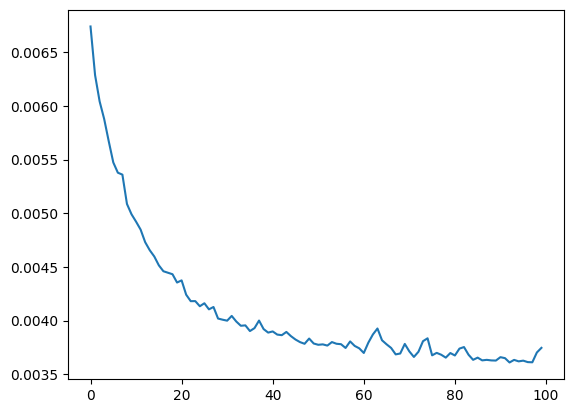

In [ ]:
plt.plot(history.history['loss'])